In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('iris.csv')

In [3]:
df.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa


In [6]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [7]:
df.Species = encoder.fit_transform(df.Species)

In [8]:
df.head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [10]:
df[df.Species == 0].head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


In [11]:
df[df.Species == 1].head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
50,51,7.0,3.2,4.7,1.4,1
51,52,6.4,3.2,4.5,1.5,1
52,53,6.9,3.1,4.9,1.5,1
53,54,5.5,2.3,4.0,1.3,1
54,55,6.5,2.8,4.6,1.5,1


In [12]:
df[df.Species == 2].head()

,ID,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
100,101,6.3,3.3,6.0,2.5,2
101,102,5.8,2.7,5.1,1.9,2
102,103,7.1,3.0,5.9,2.1,2
103,104,6.3,2.9,5.6,1.8,2
104,105,6.5,3.0,5.8,2.2,2


In [13]:
df0=df[:50]
df1=df[50:100]
df2=df[100:]

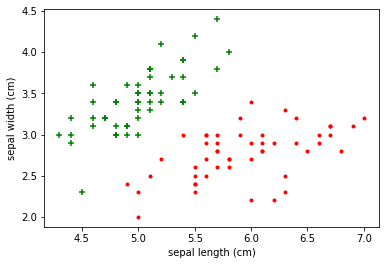

In [16]:
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.scatter(df0['Sepal.Length'],df0['Sepal.Width'],color='green',marker='+')
plt.scatter(df1['Sepal.Length'],df1['Sepal.Width'],color='red',marker='.')

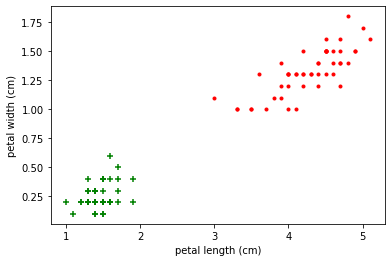

In [17]:
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')
plt.scatter(df0['Petal.Length'],df0['Petal.Width'],color='green',marker='+')
plt.scatter(df1['Petal.Length'],df1['Petal.Width'],color='red',marker='.')

In [23]:
x = df.iloc[:,1:5].values
y = df.Species.values

In [24]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [31]:
from sklearn.neighbors import KNeighborsClassifier
#p=1 is for manhattan ditance
knn=KNeighborsClassifier(n_neighbors=9, p=1)

In [32]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=9, p=1)

In [33]:
y_pred = y_test

In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test,y_pred)
score = accuracy_score(y_test,y_pred)
report = classification_report(y_test,y_pred)

In [38]:
print(score)

1.0


In [37]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      1.00      1.00         6
           2       1.00      1.00      1.00        15

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



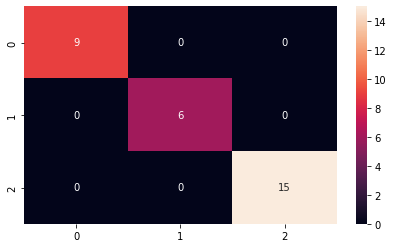

In [39]:
plt.figure(figsize=(7,4))
sns.heatmap(cm,annot=True)

In [40]:
knn.score(x_test,y_test)

0.8